In [849]:
import numpy as np
import pandas as pd
import os
import json
from datetime import datetime, timedelta

In [850]:
folders = os.listdir('Raw_data')
files = {}

for folder in folders:
    unfiltered_files = os.listdir("Raw_data\\"+str(folder))
    filtered = filter(lambda x: x.split('.')[-1] == 'csv', unfiltered_files)
    filtered_files = []
    count = 0
    for file in filtered:
        filtered_files.append(str(file).split('.')[0])
    files.update({folder: filtered_files})
    
files

{'VA00000000000017': ['RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYjMtODJkYy1kMTE0MDg4OTBkOGQ=',
  'RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MTUtYjFmOC0xMDdlNWI0ODNhY2Y=',
  'RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MGMtYmRiNC1jMWRlZGI5MmM3M2M=',
  'RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYTctYjA4YS01ZjZmMGUzNmZjMjc=',
  'RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3NzMtOWI2Zi02YzcwODkzMDU1NGQ=',
  'RXZlbnRJbmZvcm1hdGlvbjo1ZWQyODcxZS0wYTI1LTQxMWUtOGQ0My0xOTRiZjI3ZDc4ZDA=',
  'RXZlbnRJbmZvcm1hdGlvbjo2MGIxMzM3My03NmIwLTRhZTktYjRiYS0wNDcwMDY1NWU2YWQ=',
  'RXZlbnRJbmZvcm1hdGlvbjo2MWE0NzMzZS02NTkzLTRlNmQtOGIxMy0yMWUwZjFiNWE1ZWM=',
  'RXZlbnRJbmZvcm1hdGlvbjo2ZGEzODliYy02M2I1LTRmNzUtODZhYi0zMDBlY2Y4ZWVmYWI=',
  'RXZlbnRJbmZvcm1hdGlvbjo2ZjYwZTlhNC05OWNhLTRlODAtYTAwYS05MjFlZjlmNWUyMzI=',
  'RXZlbnRJbmZvcm1hdGlvbjo3NDBjM2U2OS0wOWZjLTQ2ODQtYTljMy05MTRiMzI0N2RiOWY=',
  'RXZlbnRJbmZvcm1hdGlvbjo3NjhhZDFlMi02NzIyLTQyYjQtOWJkOC00ZjQ3YjE4ODU1MGM=',
  'RXZlbnRJbmZvcm1hdGlvbjo3YjBhOWUzYi02MDk3L

In [851]:
time_frame = 400
data = []

for folder in folders:
    folder_files = files[folder]
    for file in folder_files:
        directory = 'C:\\Users\\kaushik.agrawal\\Downloads\\Raw_data (2)\\Raw_data\\'+folder+'\\'+file
        data_file = pd.read_csv(directory+'.csv')
        with open(directory+'.json') as json_data:
            Event_ID = json.load(json_data)['Event_ID']
        data_file['last_10sec_mean'] = data_file['sum'].rolling(time_frame).mean()
        data_file['second'] = data_file['timestamp']//1
        data_file.loc[:0,'Event_ID'] = Event_ID
        data.append(data_file)

In [852]:
data[0]

,t,lc0,lc1,lc2,lc3,timestamp,sum,last_10sec_mean,second,Event_ID
0,0 days 00:00:00,4814,2504,5337,701,0.000000,13356,NaN,0.0,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...
1,0 days 00:00:00.025000,4656,2789,5481,497,0.025000,13423,NaN,0.0,NaN
2,0 days 00:00:00.050000,4566,3137,5583,483,0.050000,13769,NaN,0.0,NaN
3,0 days 00:00:00.075000,4640,3449,5724,628,0.075000,14441,NaN,0.0,NaN
4,0 days 00:00:00.100000,4741,3531,5806,808,0.100000,14886,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
6075,0 days 00:02:31.875000,2966,2429,4511,-1695,151.874936,8211,8209.8575,151.0,NaN
6076,0 days 00:02:31.900000,2967,2427,4510,-1697,151.899936,8207,8209.8500,151.0,NaN
6077,0 days 00:02:31.925000,2966,2429,4511,-1695,151.924936,8211,8209.8500,151.0,NaN
6078,0 days 00:02:31.950000,2967,2428,4510,-1696,151.949936,8209,8209.8475,151.0,NaN


In [853]:
def Activity(tag):
    if 'urination' in tag:
        return 'urination'
    elif 'non_elimination' in tag:
        return 'non_elimination'
    elif 'defecation' in tag:
        return 'defecation'
    
def Cat_In_Box(tag):
    if 'cat in box' in tag:
        return 1
    return 0

def Synapse_Labeled(tag):
    if 'synapse_labeled' in tag:
        return 1
    return 0

def Tare_Weight_Fun(w):
    if type(w) is list:
        return sum(w)
    return np.nan

In [854]:
check = pd.DataFrame()

for folder in folders:
    folder_files = files[folder]
    for file in folder_files:
        directory = 'C:\\Users\\kaushik.agrawal\\Downloads\\Raw_data (2)\\Raw_data\\'+folder+'\\'+file
        with open(directory+'.json') as json_data:
            json_file = json.load(json_data)
        temp = pd.DataFrame([json_file])
        temp['Weight_of_cat'] = float(temp['Weight_of_cat'])
        check = check.append(temp,ignore_index=True)

#final['Event_Date'] =final['Event_start_time'].apply(lambda x: x.split('T')[0])
#temp = final['Event_start_time'].apply(lambda x: x.split('-05:00')[0])
#final['Event_start_time'] = pd.to_datetime(temp, format='%Y-%m-%dT%H:%M:%S') - timedelta(hours=5)
#final['Given_Tare_Weight'] = final['Tare_weight'].apply(Tare_Weight_Fun)
#final = final.drop('Tare_weight', axis=1)
check

,Device_ID,Event_ID,Event_start_time,Tags,Free_text,Name_of_cat,Weight_of_cat,Tare_weight
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05T10:56:11-05:00,"[urination, cat in box]",None,Ryan,6589.0,None
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18T14:41:37-05:00,"[cat in box, synapse_labeled, urination]","14:42:15\t14:43:09\tConfirmed activity, cat in...",Ryan,6935.0,None
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03T15:43:43-05:00,"[cat in box, urination]",None,Ryan,5139.0,None
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01T12:02:05-05:00,"[non_elimination, cat in box]",None,Ryan,6983.0,None
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08T06:47:11-05:00,"[cat in box, synapse_labeled, urination]","6:47:16\t6:48:59\tConfirmed activity, cat in t...",Ryan,7017.0,None
...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-24T01:36:18-05:00,"[urination, cat in box]","1:36:18\t1:37:07\tConfirmed activity, cat in t...",Sparkler,4116.0,"[2340, 868, 2150, 1626]"
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26T06:29:01-05:00,"[cat in box, non_elimination]",None,Sparkler,4604.0,"[3577, 400, 2043, 1747]"
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-27T03:47:55-05:00,"[urination, cat in box]",None,Sparkler,4416.0,"[4313, -14729, 1754, 1697]"
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-02T01:15:57-05:00,"[cat in box, defecation]","1:15:53\t1:19:07\tConfirmed activity, cat in t...",Sparkler,4386.0,"[3702, -893, 1561, 1940]"


In [855]:
check.isnull().sum()

Device_ID              0
Event_ID               0
Event_start_time       0
Tags                   0
Free_text           2427
Name_of_cat          246
Weight_of_cat          0
Tare_weight         1013
dtype: int64

In [856]:
final = pd.DataFrame()

for folder in folders:
    folder_files = files[folder]
    for file in folder_files:
        directory = 'C:\\Users\\kaushik.agrawal\\Downloads\\Raw_data (2)\\Raw_data\\'+folder+'\\'+file
        with open(directory+'.json') as json_data:
            json_file = json.load(json_data)
        tags = json_file['Tags']
        del json_file['Tags']
        del json_file['Free_text']
        activity = Activity(tags)
        cat_in_box = Cat_In_Box(tags)
        synapse_labeled = Synapse_Labeled(tags)
        json_file.update({'Activity': activity})
        json_file.update({'Cat_In_Box': cat_in_box})
        json_file.update({'Synapse_Labeled': synapse_labeled})
        temp = pd.DataFrame([json_file])
        temp['Weight_of_cat'] = float(temp['Weight_of_cat'])
        final = final.append(temp,ignore_index=True)

final['Event_Date'] =final['Event_start_time'].apply(lambda x: x.split('T')[0])
temp = final['Event_start_time'].apply(lambda x: x.split('-05:00')[0])
final['Event_start_time'] = pd.to_datetime(temp, format='%Y-%m-%dT%H:%M:%S') - timedelta(hours=5)
final['Given_Tare_Weight'] = final['Tare_weight'].apply(Tare_Weight_Fun)
final = final.drop('Tare_weight', axis=1)
final

,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,Given_Tare_Weight
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 05:56:11,Ryan,6589.0,urination,1,0,2020-09-05,NaN
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 09:41:37,Ryan,6935.0,urination,1,1,2020-07-18,NaN
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 10:43:43,Ryan,5139.0,urination,1,0,2020-09-03,NaN
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 07:02:05,Ryan,6983.0,non_elimination,1,0,2020-09-01,NaN
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 01:47:11,Ryan,7017.0,urination,1,1,2020-08-08,NaN
...,...,...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-23 20:36:18,Sparkler,4116.0,urination,1,0,2021-08-24,6984.0
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 01:29:01,Sparkler,4604.0,non_elimination,1,0,2021-04-26,7767.0
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-26 22:47:55,Sparkler,4416.0,urination,1,0,2021-04-27,-6965.0
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-01 20:15:57,Sparkler,4386.0,defecation,1,0,2021-09-02,6310.0


In [857]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13075 entries, 0 to 13074
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Device_ID          13075 non-null  object 
 1   Event_ID           13075 non-null  object 
 2   Event_start_time   13075 non-null  object 
 3   Name_of_cat        12829 non-null  object 
 4   Weight_of_cat      13075 non-null  float64
 5   Activity           13072 non-null  object 
 6   Cat_In_Box         13075 non-null  int64  
 7   Synapse_Labeled    13075 non-null  int64  
 8   Event_Date         13075 non-null  object 
 9   Given_Tare_Weight  12062 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1021.6+ KB


In [858]:
def Buffer_Tare_Weight_Fun(weight):
    if weight >= 0:
        return weight*1.035
    else:
        return weight*0.99

In [859]:
def Buffer_Tare_Weight_Fun(weight):
    if weight >= 0:
        return weight*1.035
    else:
        return weight*0.99
    
def Step_In_Out_Time(row, tare):
    flag = True
    sit_times = 0
    step_out = 0
    step_in = 0
    longest_step_in = 0
    longest_step_out = 0
    longest_sit = 0
    first_stepin_time = 0
    first_stepout_time = 0
    last_stepin_time = 0
    last_stepout_time = 0
    
    while(flag):
        sit_times += 1
        step_in = data[row][(data[row]['sum'] > (tare+final['Weight_of_cat'][row])*0.98) & (data[row]['timestamp'] > step_out)]['timestamp'].min()
        step_out = data[row][(data[row]['sum'] < Buffer_Tare_Weight_Fun(tare)) & (data[row]['timestamp'] > step_in)]['timestamp'].min()
        check = ((data[row]['timestamp'] > step_out) & (data[row]['sum'] > (tare+final['Weight_of_cat'][row])*0.98)).sum()
        sit_time = step_out - step_in
        last_stepin_time = step_in
        last_stepout_time = step_out
        if sit_times == 1:
            first_stepin_time = step_in
            first_stepout_time = step_out
        if sit_time > longest_sit:
            longest_sit = sit_time
            longest_step_in = step_in
            longest_step_out = step_out
        if check > 0:
            flag = True
        else:
            flag = False
    return longest_step_in, longest_step_out, longest_sit, sit_times, first_stepin_time, first_stepout_time, last_stepin_time ,last_stepout_time

In [839]:
Calculated_Tare_Weight = []
Activity_Duration = []
Stepping_In_Time = []
Stepping_Out_Time = []
Sit_Time = []
Times_Stepped = []
First_Stepin_Time = []
First_Stepout_Time = []
Last_Stepin_Time = []
Last_Stepout_Time = []


for row in range(len(final)):
    Calculated_Tare_Weight.append(data[row][(data[row]['timestamp'] > (data[row].iloc[len(data[row])-1]['timestamp'])-5) & (data[row]['timestamp'] <= data[row].iloc[len(data[row])-1]['timestamp'])]['sum'].mean())
    Activity_Duration.append(data[row].iloc[len(data[row])-1]['timestamp'])
    step_in, step_out, sit, times_stepped, First_stepin_time, First_stepout_time, Last_stepin_time ,Last_stepout_time = Step_In_Out_Time(row, Tare_Weight[row])
    Stepping_In_Time.append(step_in)
    Stepping_Out_Time.append(step_out)
    Sit_Time.append(sit)
    Times_Stepped.append(times_stepped)
    First_Stepin_Time.append(First_stepin_time)
    First_Stepout_Time.append(First_stepout_time)
    Last_Stepin_Time.append(Last_stepin_time)
    Last_Stepout_Time.append(Last_stepout_time)
    

final['Activity_Duration'] = Activity_Duration
final['Calculated_Tare_Weight'] = Calculated_Tare_Weight
final['Weight_With_Cat'] = final['Calculated_Tare_Weight'] + final['Weight_of_cat']
final['Stepping_In_Time'] = Stepping_In_Time
final['Stepping_Out_Time'] = Stepping_Out_Time
final['Sit_Time'] = Sit_Time
final['Times_Stepped'] = Times_Stepped
final['First_Stepin_Time'] = First_Stepin_Time
final['First_Stepout_Time'] = First_Stepout_Time
final['Last_Stepin_Time'] = Last_Stepin_Time
final['Last_Stepout_Time'] = Last_Stepout_Time

final

,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,Given_Tare_Weight,...,Calculated_Tare_Weight,Weight_With_Cat,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 05:56:11,Ryan,6589.0,urination,1,0,2020-09-05,NaN,...,8209.766169,14798.766169,0.100000,44.699942,44.599942,1,0.4,84.937078,0.4,84.937078
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 09:41:37,Ryan,6935.0,urination,1,1,2020-07-18,NaN,...,6798.109453,13733.109453,0.725000,52.750000,52.025000,1,0.4,84.937078,0.4,84.937078
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 10:43:43,Ryan,5139.0,urination,1,0,2020-09-03,NaN,...,8743.395000,13882.395000,1.674942,45.599933,43.924991,1,0.4,84.937078,0.4,84.937078
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 07:02:05,Ryan,6983.0,non_elimination,1,0,2020-09-01,NaN,...,8791.100000,15774.100000,0.025000,11.849934,11.824934,1,0.4,84.937078,0.4,84.937078
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 01:47:11,Ryan,7017.0,urination,1,1,2020-08-08,NaN,...,4762.402985,11779.402985,0.025000,50.325000,50.300000,1,0.4,84.937078,0.4,84.937078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-23 20:36:18,Sparkler,4116.0,urination,1,0,2021-08-24,6984.0,...,7031.631841,11147.631841,0.150000,48.608258,48.458258,1,0.4,84.937078,0.4,84.937078
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 01:29:01,Sparkler,4604.0,non_elimination,1,0,2021-04-26,7767.0,...,7752.402985,12356.402985,55.210079,71.608398,16.398319,1,0.4,84.937078,0.4,84.937078
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-26 22:47:55,Sparkler,4416.0,urination,1,0,2021-04-27,-6965.0,...,7598.258706,12014.258706,0.025000,77.918402,77.893402,1,0.4,84.937078,0.4,84.937078
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-01 20:15:57,Sparkler,4386.0,defecation,1,0,2021-09-02,6310.0,...,6334.368159,10720.368159,0.025000,195.116902,195.091902,1,0.4,84.937078,0.4,84.937078


In [817]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13075 entries, 0 to 13074
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Device_ID               13075 non-null  object 
 1   Event_ID                13075 non-null  object 
 2   Event_start_time        13075 non-null  object 
 3   Name_of_cat             12829 non-null  object 
 4   Weight_of_cat           13075 non-null  float64
 5   Activity                13072 non-null  object 
 6   Cat_In_Box              13075 non-null  int64  
 7   Synapse_Labeled         13075 non-null  int64  
 8   Event_Date              13075 non-null  object 
 9   Given_Tare_Weight       12062 non-null  float64
 10  Activity_Duration       13075 non-null  float64
 11  Calculated_Tare_Weight  13075 non-null  float64
 12  Weight_With_Cat         13075 non-null  float64
 13  Stepping_In_Time        13075 non-null  float64
 14  Stepping_Out_Time       13075 non-null

In [822]:
final.head()

,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,Given_Tare_Weight,...,Calculated_Tare_Weight,Weight_With_Cat,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 05:56:11,Ryan,6589.0,urination,1,0,2020-09-05,NaN,...,8209.766169,14798.766169,0.100000,44.699942,44.599942,1,0.4,84.937078,0.4,84.937078
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 09:41:37,Ryan,6935.0,urination,1,1,2020-07-18,NaN,...,6798.109453,13733.109453,0.725000,52.750000,52.025000,1,0.4,84.937078,0.4,84.937078
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 10:43:43,Ryan,5139.0,urination,1,0,2020-09-03,NaN,...,8743.395000,13882.395000,1.674942,45.599933,43.924991,1,0.4,84.937078,0.4,84.937078
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 07:02:05,Ryan,6983.0,non_elimination,1,0,2020-09-01,NaN,...,8791.100000,15774.100000,0.025000,11.849934,11.824934,1,0.4,84.937078,0.4,84.937078
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 01:47:11,Ryan,7017.0,urination,1,1,2020-08-08,NaN,...,4762.402985,11779.402985,0.025000,50.325000,50.300000,1,0.4,84.937078,0.4,84.937078


In [818]:
final.to_csv('final.csv')

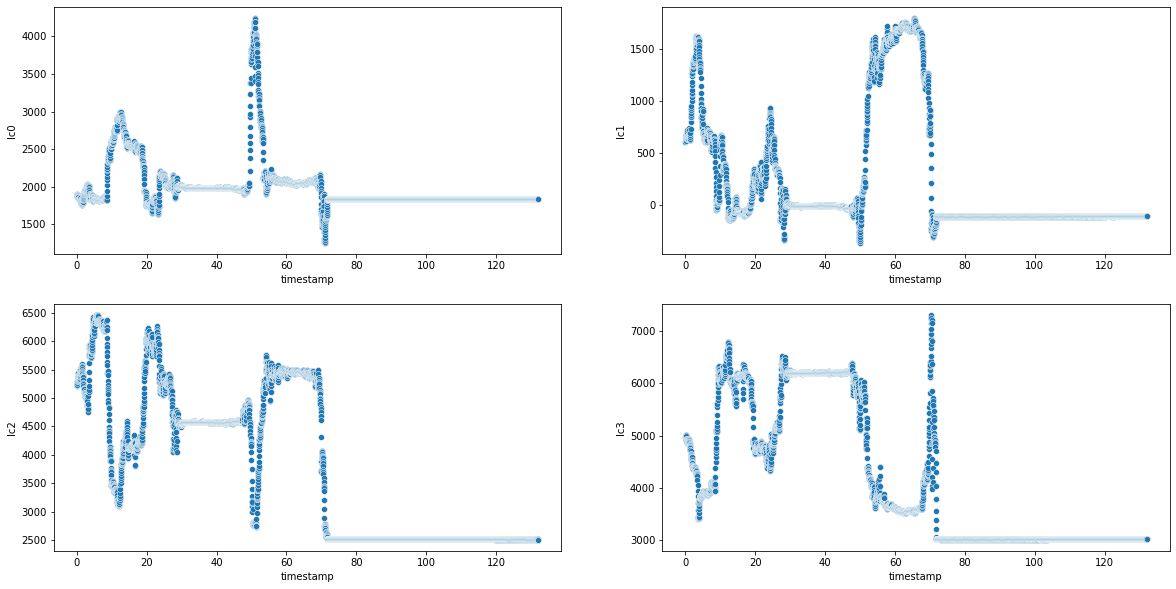

In [877]:
#plot = data[0].groupby('second').mean()
plot = data[572]

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)


ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x='timestamp',y='lc0',data = plot)

ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x='timestamp',y='lc1',data = plot)


ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x='timestamp',y='lc2',data = plot)


ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(x='timestamp',y='lc3',data = plot)

plt.show()

########################## Sum of all 4 sensors ##########################


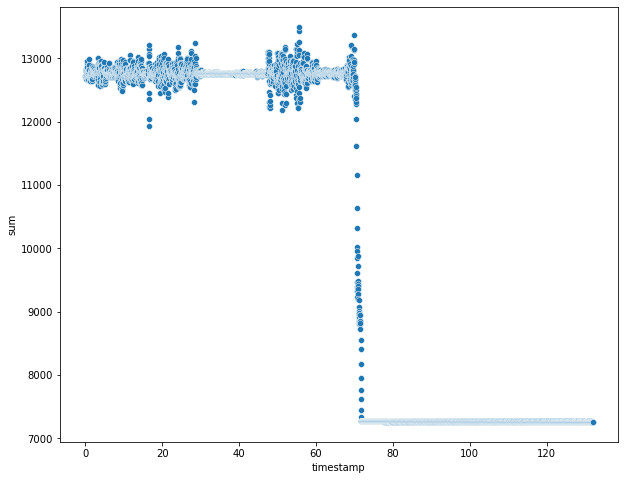

In [878]:
print("########################## Sum of all 4 sensors ##########################")

fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)


ax1 = fig.add_subplot(1, 1, 1)
sns.scatterplot(x='timestamp',y='sum',data = plot)

plt.show()